In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

import skimage
from skimage import io, measure, exposure, filters
from skimage.color import rgba2rgb, rgb2gray
from sklearn.cluster import KMeans
from skimage.util import compare_images
from skimage.filters.rank import entropy
from skimage.feature import greycomatrix, greycoprops
from skimage.morphology import disk

from scipy.stats import entropy

import os
import csv

%matplotlib inline

In [2]:


def extract_features(image_input):
    gray =  rgb2gray(image_input)
    [counts, bins] = exposure.histogram(gray,nbins=8,source_range='dtype',normalize=True)
    v = counts.flatten()
    
 
    fig, ax = plt.subplots(figsize=(12, 12))
    plt.subplot(1,3,1)
    plt.imshow(image_input)
    plt.subplot(1,3,2)
    plt.imshow(gray)
    
    gray_uint = (255*gray).astype(np.uint8)
    glcm = greycomatrix(gray_uint, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
    plt.subplot(1,3,3)
    plt.imshow(gray_uint)

    
    v2 = np.zeros(6)
    v2[0] = greycoprops(glcm, 'contrast')[0, 0]
    v2[1] = greycoprops(glcm, 'dissimilarity')[0, 0]
    v2[2] = greycoprops(glcm, 'homogeneity')[0, 0]
    v2[3] = greycoprops(glcm, 'ASM')[0, 0]
    v2[4] = greycoprops(glcm, 'energy')[0, 0]
    v2[5] = greycoprops(glcm, 'correlation')[0, 0]

    print(v2)
    return v

[4.46818379e+03 4.91212710e+01 6.03003890e-02 2.06416639e-04
 1.43672071e-02 4.03803133e-01]
[0.         0.         0.         0.         0.21472168 0.32917404
 0.23672104 0.21938324]


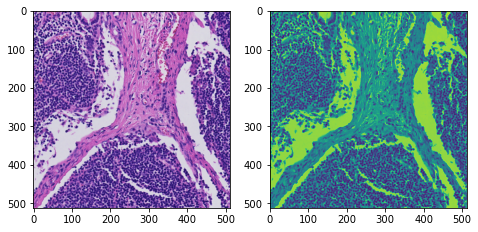

In [4]:
#/Users/ying/Documents/CIS Project/测试图片（p_045_node0）/有癌细胞/01_17_22.png

img_loc = '/Users/ying/Documents/CIS Project/测试图片（p_045_node0）/有癌细胞/01_17_23.png'

img = io.imread(img_loc)

result = extract_features(img)

print(result)
